# Distance, Nearest Neighbors, and KMeans 

## Objectives

* Review various distance methods commonly used in data science
* Learn how distance is used to the application of K Nearest Neighbors
* Solving for means in clusters with K means
* learning how to interpret results from unsupervised learning

## Class Notes

### K Nearest Neighbors (KNN)

Nearest Neighbors is a seemingly simple enough algorithm, though in reality it is quite different from others learned so far, in terms of classification:

1. Many of the classifiers used so far are _discriminative_, that is, they draw decision lines to define and separate classes (with the exception of logistic regression). KNN is _generative_, meaning it learns the space defined for each class, and uses that as its decision line.
2. Many of the classifiers we've used also use exploratory rules to define classes (with the exception of support vector machines), such as odds and probability. KNN solves for class using _distance_ and _similarity_.

This makes KNN fairly intuitive to understand, though not very explanatory as a learner. Because of this, KNN fairs well as an _imputer_ (what is an imputer?). KNN essentially boils down to:

1. Pick a number for k and an observation features X and target y.
2. Find the k closest data points to the observation.
3. Whichever is the most common class of the neighbors in the target assignment.

### Distance Formulas

There are a variety of ways to calculate similar and distance. Below are a few common examples and when you'd expect to use them.

**Jaccard Coefficient / Jaccard Distance**

The Jaccard Coefficient follows simple logic, and based on probability:

$J(A,B) = \dfrac{|A \cap B|}{|A \cup B}$

The above would read, "Jaccard's similarity coefficient between sets A and B would be the intersection of A and B divided by the union of A and B." 

A _union_ is all unique possible values from each set combined, while an _intersection_ is what they have in common. Consider these two sets defining two houses:

In [3]:
import pandas as pd

houses = pd.DataFrame({
        'rooms': [2, 1],
        'bathrooms': [1, 1],
        'stove': ['gas', 'electric'],
        'heat': ['radiator', 'radiator'],
})

houses

,bathrooms,heat,rooms,stove
0,1,radiator,2,gas
1,1,radiator,1,electric


The union of the two houses would contain the set:

bathrooms_1, heat_radiator, rooms_2, rooms_1, stove_gas, stove_electric

And the intersection would contain:

bathrooms_1, heat_radiator

We'd get a Jaccard coefficient of 0.333:

$\dfrac{len(intersection)}{len(union} = \dfrac{2}{6}$

Jaccard's distance is just a matter of 1 - the similarity coefficient, so the distance of similarity between theses houses would be .667.

Jaccard's distance is great to use as a **distance metric for binary and categorical data**.

#### Minkowski distance (Manhattan, Euclidian)

**Manhattan Distance**


Think of Manhattan distance (or Taxi distance) as the distance to travel between two points given a grid like system (like Manhattan). So, if avenue and street blocks were the same distance, the Manhattan distance from Google (14th Street and 8th Ave) to the General Assembly (21st St and 5th Ave) would be 10 blocks. Manhattan distance is solved as:

$distance = \sum{|n_1 - n_2|}$

where $n$ is each feature. (_Sidebar: This is the same concept as L1 regularization_)

**Euclidean Distance**

$distance = \sum{\sqrt{(n_1 - n_2)^2}}$

Euclidean Distance is more similar to, say, helicopter distance: if we had to travel between two points, what would be the straight line taking us from point a to point b? (_Sidebar: This is the same concept as L2 regularization_)

**What to use?**

These two distances are summed up as *Minkowski distances*, Manhattan being Minkowski with a p of 1, and Euclidean being Minkowski with a p of 2. 

Both of these distance metrics work well with continuous data, though it is recommended to use **Manhattan distance when a distance set of 1 and 3 should be treated the same as a distance set of 2 and 2.** 

### Imputation with K Means

### KMeans

Imputation is fairly intuitive. For the missing data in our dataset, we're going to replace it with values that come from similar records in our dataset that aren't null. To do this we're going to use the NearestNeighbors algorithm. Even imputing, we will use a cross validation set.

In [11]:
from sklearn import cross_validation
df = pd.read_csv("../data/credit-data-post-import.csv")

train, test = cross_validation.train_test_split(df)
train = pd.DataFrame(train, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

income_imputer = KNeighborsRegressor(n_neighbors=1)

# split our data into 2 groups; data containing nulls, and data not containing nulls.
# we'll train on the latter and make 'predictions' on the null data to impute monthly_income
train_w_monthly_income = train[train.monthly_income.isnull()==False]
train_w_null_monthly_income = train[train.monthly_income.isnull()==True]

In [34]:
correlations = train_w_monthly_income.corr()

# which columns are most correlated with monthly income? This will help us find our KNN features

monthly_income_correlations = pd.Series(a.ix[:, 5])
monthly_income_correlations.order(ascending=False)

monthly_income                                 1.000000
number_real_estate_loans_or_lines              0.117124
number_of_open_credit_lines_and_loans          0.083389
number_of_dependents                           0.057949
age                                            0.034244
revolving_utilization_of_unsecured_lines       0.007649
number_of_time30-59_days_past_due_not_worse   -0.009359
number_of_time60-89_days_past_due_not_worse   -0.010090
number_of_times90_days_late                   -0.011633
serious_dlqin2yrs                             -0.018324
debt_ratio                                    -0.026682
Name: monthly_income, dtype: float64

In [40]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']

income_imputer = KNeighborsRegressor(n_neighbors=1, p=2)
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

# fill in the missing data with the imputed values!
train_w_null_monthly_income['monthly_income'] = income_imputer.predict(train_w_null_monthly_income[cols])

test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()


/Users/ed/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


,monthly_income,monthly_income_imputed
0,NaN,3553
1,10833,6000
2,7800,5000
3,2117,3500
4,5000,11150


In [42]:
income_imputer = KNeighborsRegressor(n_neighbors=2, p=2)
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

# fill in the missing data with the imputed values!
train_w_null_monthly_income['monthly_income'] = income_imputer.predict(train_w_null_monthly_income[cols])

test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()


/Users/ed/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


,monthly_income,monthly_income_imputed
0,NaN,4456.0
1,10833,5708.0
2,7800,5257.0
3,2117,3623.5
4,5000,8825.0


In [71]:
from sklearn import grid_search

imputer = KNeighborsRegressor()
parameters = {'p':(1, 2), 'n_neighbors':range(1, 21)}

regr = grid_search.GridSearchCV(imputer, parameters, scoring='mean_squared_error')
regr.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

GridSearchCV(cv=None,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': (1, 2), 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [72]:
for score in regr.grid_scores_:
    print score

print regr.best_estimator_ 

mean: -270886750.94038, std: 242477744.16973, params: {'n_neighbors': 1, 'p': 1}
mean: -269809047.86726, std: 240971674.47654, params: {'n_neighbors': 1, 'p': 2}
mean: -269447599.86644, std: 225218517.72601, params: {'n_neighbors': 2, 'p': 1}
mean: -269176312.01434, std: 224863074.80939, params: {'n_neighbors': 2, 'p': 2}
mean: -256943163.16568, std: 229081292.29034, params: {'n_neighbors': 3, 'p': 1}
mean: -256805743.85236, std: 228946902.76800, params: {'n_neighbors': 3, 'p': 2}
mean: -253683625.81002, std: 231865583.54545, params: {'n_neighbors': 4, 'p': 1}
mean: -253776093.92088, std: 231800523.68828, params: {'n_neighbors': 4, 'p': 2}
mean: -251280299.37446, std: 232839090.71941, params: {'n_neighbors': 5, 'p': 1}
mean: -251394069.66062, std: 232745457.15655, params: {'n_neighbors': 5, 'p': 2}
mean: -250078301.51792, std: 231430792.42482, params: {'n_neighbors': 6, 'p': 1}
mean: -250138535.42756, std: 231471619.12462, params: {'n_neighbors': 6, 'p': 2}
mean: -248851365.13483, std:

Read through the results of the grid search above and take a few minutes to answer the following questions:

1. Which parameter setting performed the best? Which performed the worst?
2. Do we notice any differences between the values for k neighbors?
3. Do we notice any differences between Manhattan (p=1) and Euclidean (p=2)? 



Let's walk through the same example, but using Neighbors in its more common form as a classifier. In this case, we'll classify the iris flowers.

In [100]:
from sklearn import grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
parameters = {'p': [2], 'n_neighbors':range(1, 100)}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters, scoring='accuracy')
clf.fit(iris.data, iris.target)                            

GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': [2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

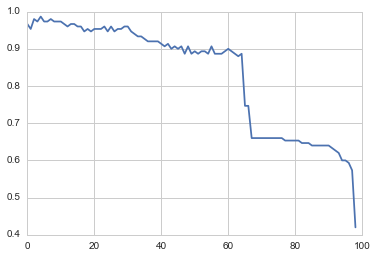

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
scores = [i.mean_validation_score for i in clf.grid_scores_]
plt.plot(scores)

Take a few minutes to answer these questions:

1. What happens to the accuracy of the algorihm as there are more neighbors used?
2. Why do you think the accuracy suddently drops around 65 neighbors on the iris data set?
3. Why again at 100 neighbors?

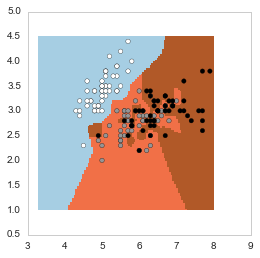

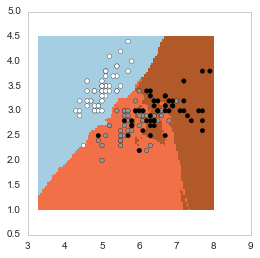

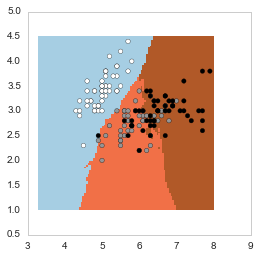

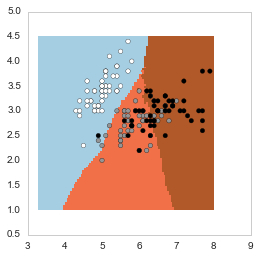

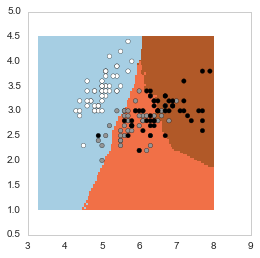

In [122]:
import numpy as np
def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    x_min, x_max = X[:,0].min() -1, X[:,0].max() +.1
    y_min, y_max = X[:,1].min() -1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z = Z.reshape (xx.shape)
    plt.figure(figsize=(4, 4))
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    return plt.scatter(X[:,0], X[:,1], c=y)
    
for e, k in enumerate([1, 5, 40, 60, 100]):
    plot_estimator(KNeighborsClassifier(n_neighbors=k), iris.data[:,:2], iris.target)
    

### K Means